# Analysis and Informal Plotting of Mouse Tracking Data

Before doing any of the Python snippets below, must first use `process.py` to parse raw data and generate a number of data files: 
- `processed.csv`, which contains the summary statistics
- `nx.csv`, `ny.csv`, `rx.csv`, and `rx.csv`, which contain the actual processed mouse trajectories.

Note: before process.py can operate correctly, there are a few trials that must be manually removed from CSV files.  They are listed in data/notes.md





In [2]:
import os 
import glob

import numpy as np # Numeric calculation
import pandas as pd # General purpose data analysis library
import squeak # For mouse data

# For plotting
import matplotlib.pyplot as plt 
%matplotlib inline
# Prettier default settings for plots (optional)
import seaborn
seaborn.set_style('white')
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

In [4]:
data = pd.read_csv('processed.csv') # import data from preprocessed CSV files
nx = pd.read_csv('nx.csv')
ny = pd.read_csv('ny.csv')
rx = pd.read_csv('rx.csv')
ry = pd.read_csv('ry.csv')

In [5]:
dataCorrect=data.loc[data['accuracy']==1] # include only correct trials


In [6]:
dataCorrect.rt=dataCorrect['rt'].astype(float) # convert some RTs to floats (not sure why this is occurring)  ignore the error that it throws
float(len(dataCorrect))/float(len(data)) # accuracy

/usr/local/lib/python2.7/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0.908282208588957

After subsetting on the correct trials, we can use the '.groupby()' function in Python to generate tables of means and SDs

In [7]:
# tables of means (USE THIS!!!)
print dataCorrect.groupby(['truth','size','operation','SOAcondition'])['rt','init_time'].mean()

                                             rt   init_time
truth size  operation SOAcondition                         
False large add       negative      1455.160180  411.077844
                      neutral       1483.444609  417.843427
            mult      negative      1431.397678  396.342525
                      neutral       1463.770803  410.773723
      small add       negative      1429.639726  384.876712
                      neutral       1483.712912  398.021978
            mult      negative      1345.512953  390.595855
                      neutral       1379.624021  406.292428
True  large add       negative      1412.224860  404.413408
                      neutral       1453.341326  410.070522
            mult      negative      1310.382507  399.060052
                      neutral       1330.976774  407.019355
      small add       negative      1229.755025  377.738693
                      neutral       1252.764855  387.964602
            mult      negative      1255

In [8]:
# tables of Standard Deviations (DON'T USE THIS!!!)
print dataCorrect.groupby(['truth','size','operation','SOAcondition'])['rt','init_time'].std()

                                            rt   init_time
truth size  operation SOAcondition                        
False large add       negative      406.734887  250.946108
                      neutral       426.038879  256.730845
            mult      negative      396.387699  231.834140
                      neutral       388.205805  233.371206
      small add       negative      382.696254  220.669386
                      neutral       416.549488  235.621312
            mult      negative      338.401267  220.580904
                      neutral       357.144268  221.435809
True  large add       negative      430.880609  243.426742
                      neutral       447.032468  255.162783
            mult      negative      377.599097  233.081442
                      neutral       351.417946  236.772590
      small add       negative      353.011770  204.741069
                      neutral       348.475908  208.064690
            mult      negative      331.329013  209.6160

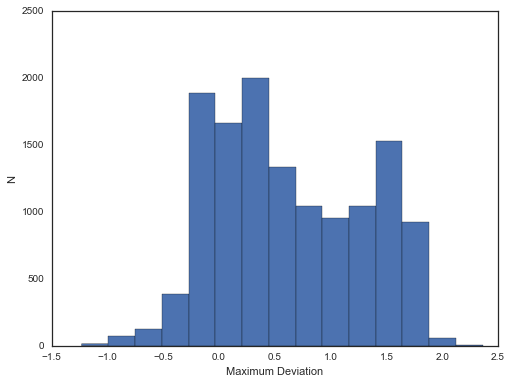

In [9]:
plt.hist(data.md, bins=15)
plt.xlabel("Maximum Deviation")
plt.ylabel("N")
plt.show()

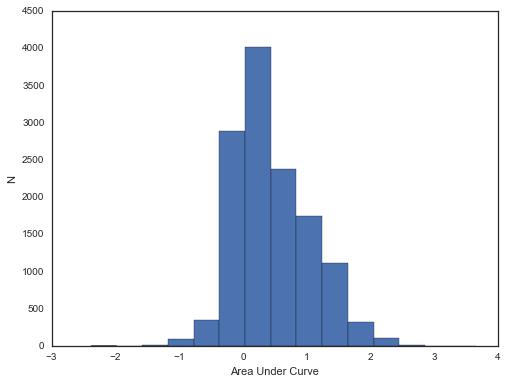

In [10]:
plt.hist(data.auc, bins=15)
plt.xlabel("Area Under Curve")
plt.ylabel("N")
plt.show()

In [11]:
print dataCorrect.groupby(['truth','size','operation','SOAcondition'])['md','auc','xflips'].mean()

                                          md       auc    xflips
truth size  operation SOAcondition                              
False large add       negative      0.741271  0.546617  0.747006
                      neutral       0.737546  0.544942  0.751846
            mult      negative      0.761420  0.577571  0.851959
                      neutral       0.776055  0.576029  0.845255
      small add       negative      0.828452  0.624688  0.794521
                      neutral       0.818552  0.632605  0.869505
            mult      negative      0.701909  0.567570  0.647668
                      neutral       0.734767  0.562852  0.684073
True  large add       negative      0.608449  0.405927  0.709497
                      neutral       0.617547  0.409296  0.730606
            mult      negative      0.498553  0.338204  0.596606
                      neutral       0.519769  0.366533  0.596129
      small add       negative      0.439298  0.303490  0.500000
                      neu

In [12]:
print dataCorrect.groupby(['truth','size','operation','SOAcondition'])['md','auc','xflips'].std()

                                          md       auc    xflips
truth size  operation SOAcondition                              
False large add       negative      0.666836  0.606281  1.212283
                      neutral       0.664403  0.604730  1.426871
            mult      negative      0.659794  0.601610  1.417755
                      neutral       0.656306  0.604340  1.489533
      small add       negative      0.652636  0.602937  1.276128
                      neutral       0.667455  0.601873  1.477294
            mult      negative      0.637344  0.603289  1.152545
                      neutral       0.637704  0.570545  1.072256
True  large add       negative      0.674220  0.582786  1.409049
                      neutral       0.658484  0.542714  1.270896
            mult      negative      0.627512  0.543145  1.159418
                      neutral       0.611809  0.552441  1.153911
      small add       negative      0.644659  0.553596  1.029746
                      neu

In [13]:
# get TRUE Addition trials
dataTrueAdd=dataCorrect.loc[(dataCorrect['truth']==1) & (dataCorrect['operation']=='add')]


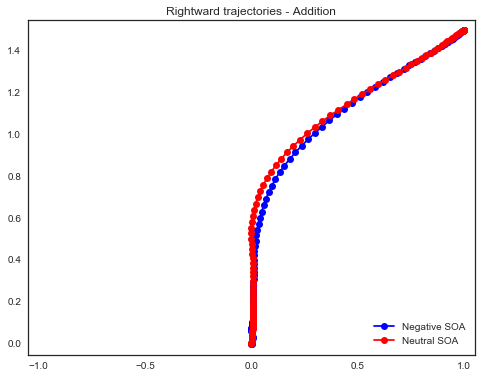

In [14]:
# Plot average *rightward* trajectories by SOAcondition
#dataRight=dataCorrect.loc[dataCorrect['response']==2] # plot ALL trials
dataRight=dataTrueAdd.loc[dataTrueAdd['response']==2] # plot only TRUE trials


negativeRight_indices = dataRight[dataRight.SOAcondition=='negative'].index
neutralRight_indices = dataRight[dataRight.SOAcondition=='neutral'].index

negRightX = nx.iloc[negativeRight_indices].mean()
negRightY = ny.iloc[negativeRight_indices].mean()

neutralRightX = nx.iloc[neutralRight_indices].mean()
neutralRightY = ny.iloc[neutralRight_indices].mean()



plt.plot(negRightX, negRightY, '-o', color='blue', label='Negative SOA')
plt.plot(neutralRightX, neutralRightY, '-o', color='red', label='Neutral SOA')
plt.legend(loc="lower right")
plt.title("Rightward trajectories - Addition")
plt.xlim((-1.05, 1.05))
plt.ylim((-.05, 1.55))
plt.show()

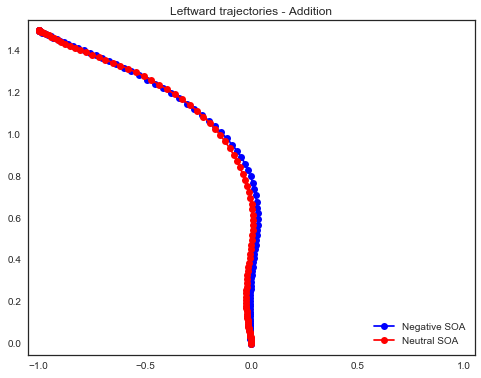

In [15]:
# Plot average *leftward* trajectories by SOAcondition
#dataLeft=dataCorrect.loc[dataTrue['response']==1] # plot ALL trials
dataLeft=dataTrueAdd.loc[dataTrueAdd['response']==1] # plot only TRUE trials



negativeLeft_indices = dataLeft[dataLeft.SOAcondition=='negative'].index
neutralLeft_indices = dataLeft[dataLeft.SOAcondition=='neutral'].index

negLeftX = -nx.iloc[negativeLeft_indices].mean()  # use negative since process.py remaps before computing AUC and MD
negLeftY = ny.iloc[negativeLeft_indices].mean()

neutralLeftX = -nx.iloc[neutralLeft_indices].mean()
neutralLeftY = ny.iloc[neutralLeft_indices].mean()



plt.plot(negLeftX, negLeftY, '-o', color='blue', label='Negative SOA')
plt.plot(neutralLeftX, neutralLeftY, '-o', color='red', label='Neutral SOA')
plt.legend(loc="lower right")
plt.title("Leftward trajectories - Addition")
plt.xlim((-1.05, 1.05))
plt.ylim((-.05, 1.55))
plt.show()

In [16]:
# get TRUE Multiplication trials
dataTrueMult=dataCorrect.loc[(dataCorrect['truth']==1) & (dataCorrect['operation']=='mult')]



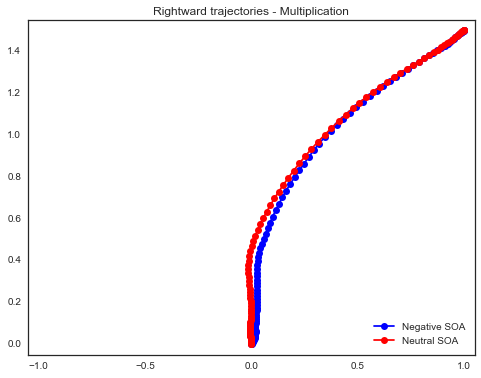

In [17]:
# Plot average *rightward* trajectories by SOAcondition
#dataRight=dataCorrect.loc[dataCorrect['response']==2] # plot ALL trials
dataRight=dataTrueMult.loc[dataTrueMult['response']==2] # plot only TRUE trials


negativeRight_indices = dataRight[dataRight.SOAcondition=='negative'].index
neutralRight_indices = dataRight[dataRight.SOAcondition=='neutral'].index

negRightX = nx.iloc[negativeRight_indices].mean()
negRightY = ny.iloc[negativeRight_indices].mean()

neutralRightX = nx.iloc[neutralRight_indices].mean()
neutralRightY = ny.iloc[neutralRight_indices].mean()



plt.plot(negRightX, negRightY, '-o', color='blue', label='Negative SOA')
plt.plot(neutralRightX, neutralRightY, '-o', color='red', label='Neutral SOA')
plt.legend(loc="lower right")
plt.title("Rightward trajectories - Multiplication")
plt.xlim((-1.05, 1.05))
plt.ylim((-.05, 1.55))
plt.show()

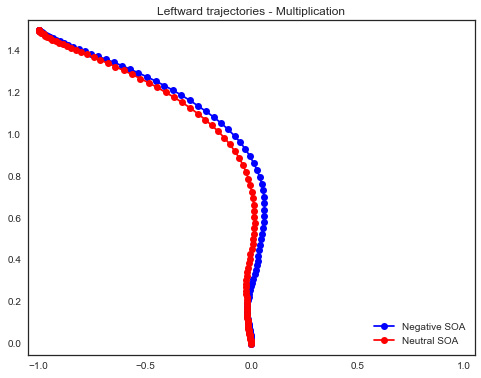

In [18]:
# Plot average *leftward* trajectories by SOAcondition
#dataLeft=dataCorrect.loc[dataTrue['response']==1] # plot ALL trials
dataLeft=dataTrueMult.loc[dataTrueMult['response']==1] # plot only TRUE trials



negativeLeft_indices = dataLeft[dataLeft.SOAcondition=='negative'].index
neutralLeft_indices = dataLeft[dataLeft.SOAcondition=='neutral'].index

negLeftX = -nx.iloc[negativeLeft_indices].mean()  # use negative since process.py remaps before computing AUC and MD
negLeftY = ny.iloc[negativeLeft_indices].mean()

neutralLeftX = -nx.iloc[neutralLeft_indices].mean()
neutralLeftY = ny.iloc[neutralLeft_indices].mean()



plt.plot(negLeftX, negLeftY, '-o', color='blue', label='Negative SOA')
plt.plot(neutralLeftX, neutralLeftY, '-o', color='red', label='Neutral SOA')
plt.legend(loc="lower right")
plt.title("Leftward trajectories - Multiplication")
plt.xlim((-1.05, 1.05))
plt.ylim((-.05, 1.55))
plt.show()